In [1]:
from LTP import *

datapath = '../data/'
MIAdir = '../dirs/Directory_2022_SummerMIAPilot.csv'
SUREdir = '../dirs/Directory_2022_SURE.csv'


In [2]:
# data = batch_from_csv(MIAdir,('22',4),['B22R'],datapath=datapath)['B22R']

data = batch_from_csv(MIAdir,('22',4),['B22L'],datapath=datapath)['B22L']
data.pickle_df('../data/')

In [2]:
data = batch_from_any(MIAdir,('22',4),['B22R'],datapath=datapath)['B22R']

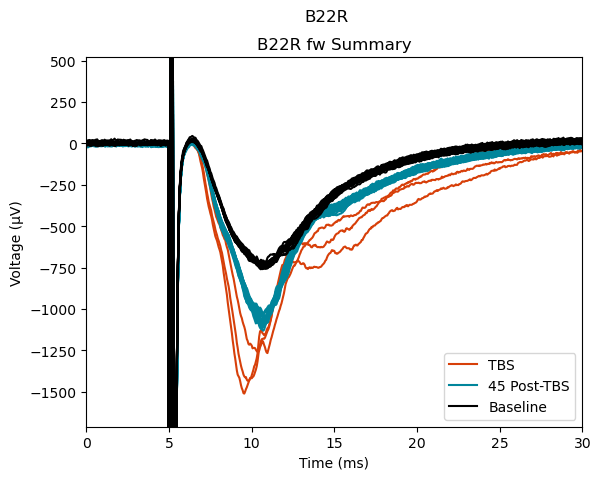

In [3]:

data.trace_summary()

In [4]:
data.hemi

'RHS1'